# Whatsapp Chat Analysis

This is the code that I write from [CampusX channel](https://www.youtube.com/watch?v=Q0QwvZKG_6Q&ab_channel=CampusX)

## Import module

In [1]:
import pandas as pd
import re

In [2]:
file = open('kost.txt', 'r', encoding='utf-8')

In [3]:
data = file.read()

In [4]:
print(data)

30/04/2019, 20.14 - Anda telah membuat grup "PDI menyatukan kita 🐃"
01/09/2019, 15.28 - Samuel Ingram: <Media tidak disertakan>
01/09/2019, 15.28 - Jeff: Hacol
01/09/2019, 15.28 - Jeff: Habis coli
01/09/2019, 15.28 - Samuel Ingram: Bau zaitun
01/09/2019, 15.28 - Jeff: Terapi
01/09/2019, 15.29 - Samuel Ingram: Pembesaran
01/09/2019, 15.43 - Ega Anyar: Lemuuu
01/09/2019, 15.43 - Samuel Ingram: Diopeni
01/09/2019, 17.42 - Dek Hendri: Lapie neh kos e sepi :
01/09/2019, 17.42 - Dek Hendri: (
01/09/2019, 17.43 - Satria: Bok crotke ngendi🤨
01/09/2019, 17.44 - Jeff: Neng raine iyok
01/09/2019, 17.45 - Dek Hendri: Gon podmu, go liquid sisn
01/09/2019, 17.46 - Satria: Matana
01/09/2019, 17.46 - Satria: Juohhj
12/09/2019, 21.15 - Satria: <Media tidak disertakan>
12/09/2019, 21.15 - Jeff: Terkenal wisan
12/09/2019, 21.15 - Jeff: Sentra koi wmg
12/09/2019, 21.16 - Samuel Ingram: Ratingen elek wkwk
12/09/2019, 21.16 - Satria: Wqwq
12/09/2019, 21.16 - Ega Anyar: Mantulll
12/09/2019, 21.17 - atrisna R

In [5]:
pattern = '\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}.\d{2}\s-\s'\
or '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern, data)[1:]
len(messages)

1398

In [7]:
dates = re.findall(pattern, data)
dates

['30/04/2019, 20.14 - ',
 '01/09/2019, 15.28 - ',
 '01/09/2019, 15.28 - ',
 '01/09/2019, 15.28 - ',
 '01/09/2019, 15.28 - ',
 '01/09/2019, 15.28 - ',
 '01/09/2019, 15.29 - ',
 '01/09/2019, 15.43 - ',
 '01/09/2019, 15.43 - ',
 '01/09/2019, 17.42 - ',
 '01/09/2019, 17.42 - ',
 '01/09/2019, 17.43 - ',
 '01/09/2019, 17.44 - ',
 '01/09/2019, 17.45 - ',
 '01/09/2019, 17.46 - ',
 '01/09/2019, 17.46 - ',
 '12/09/2019, 21.15 - ',
 '12/09/2019, 21.15 - ',
 '12/09/2019, 21.15 - ',
 '12/09/2019, 21.16 - ',
 '12/09/2019, 21.16 - ',
 '12/09/2019, 21.16 - ',
 '12/09/2019, 21.17 - ',
 '12/09/2019, 21.17 - ',
 '25/09/2019, 20.33 - ',
 '25/09/2019, 20.33 - ',
 '25/09/2019, 20.40 - ',
 '25/09/2019, 20.41 - ',
 '25/09/2019, 20.41 - ',
 '25/09/2019, 20.41 - ',
 '25/09/2019, 20.43 - ',
 '25/09/2019, 20.45 - ',
 '25/09/2019, 20.59 - ',
 '25/09/2019, 21.00 - ',
 '25/09/2019, 21.00 - ',
 '25/09/2019, 21.04 - ',
 '25/09/2019, 21.04 - ',
 '25/09/2019, 21.14 - ',
 '25/09/2019, 21.15 - ',
 '25/09/2019, 22.23 - ',


In [8]:
df = pd.DataFrame({'user_message' : messages, 'message_date': dates})
try:
    df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H.%M - ')
except:
    df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
    
df.rename(columns={'message_date' : 'date'}, inplace=True)

df.head()

,user_message,date
0,"Anda telah membuat grup ""PDI menyatukan kita 🐃""\n",2019-04-30 20:14:00
1,Samuel Ingram: <Media tidak disertakan>\n,2019-09-01 15:28:00
2,Jeff: Hacol\n,2019-09-01 15:28:00
3,Jeff: Habis coli\n,2019-09-01 15:28:00
4,Samuel Ingram: Bau zaitun\n,2019-09-01 15:28:00


## Feature I: Basic Information

### Total messages

In [9]:
df.shape

(1398, 2)

In [10]:
# separating user and messages
users = []
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: # username/telphone number
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2019-04-30 20:14:00,group_notification,"Anda telah membuat grup ""PDI menyatukan kita 🐃""\n"
1,2019-09-01 15:28:00,Samuel Ingram,<Media tidak disertakan>\n
2,2019-09-01 15:28:00,Jeff,Hacol\n
3,2019-09-01 15:28:00,Jeff,Habis coli\n
4,2019-09-01 15:28:00,Samuel Ingram,Bau zaitun\n


### Converting date

In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [12]:
df = df[df['user'] != 'group_notification']

In [13]:
df.head()

,date,user,message,year,month,day,hour,minute
1,2019-09-01 15:28:00,Samuel Ingram,<Media tidak disertakan>\n,2019,September,1,15,28
2,2019-09-01 15:28:00,Jeff,Hacol\n,2019,September,1,15,28
3,2019-09-01 15:28:00,Jeff,Habis coli\n,2019,September,1,15,28
4,2019-09-01 15:28:00,Samuel Ingram,Bau zaitun\n,2019,September,1,15,28
5,2019-09-01 15:28:00,Jeff,Terapi\n,2019,September,1,15,28


In [14]:
df[df['user'] == "putuu"].shape[0]

183

### Total words

In [15]:
words = []
for message in df['message']:
    words.extend(message.split())

In [16]:
words

['<Media',
 'tidak',
 'disertakan>',
 'Hacol',
 'Habis',
 'coli',
 'Bau',
 'zaitun',
 'Terapi',
 'Pembesaran',
 'Lemuuu',
 'Diopeni',
 '(',
 'Bok',
 'crotke',
 'ngendi🤨',
 'Neng',
 'raine',
 'iyok',
 'Gon',
 'podmu,',
 'go',
 'liquid',
 'sisn',
 'Matana',
 'Juohhj',
 '<Media',
 'tidak',
 'disertakan>',
 'Terkenal',
 'wisan',
 'Sentra',
 'koi',
 'wmg',
 'Ratingen',
 'elek',
 'wkwk',
 'Wqwq',
 'Mantulll',
 'Asu',
 'berkembang',
 'Melayani',
 'via',
 'online',
 'Posisi',
 '@6281225326062',
 '@6281226987632',
 '@6282322696883',
 '<Media',
 'tidak',
 'disertakan>',
 'Koe',
 'ngdi',
 'Sekecakne',
 'sek',
 'Kos',
 'e',
 'kaci',
 'Yoii',
 'Ooo',
 'Kosmu',
 'ngndi',
 '?',
 'Condongcatur',
 'tu',
 'Ng',
 'kene',
 'ngsi',
 'kapan',
 'ki',
 'Walah',
 'ra',
 'ngerti',
 'Sesuk',
 'wengi',
 'paling',
 'Juh',
 'muleh',
 'Ng',
 'ndi',
 'suui',
 '<Media',
 'tidak',
 'disertakan>',
 '<Media',
 'tidak',
 'disertakan>',
 '<Media',
 'tidak',
 'disertakan>',
 '<Media',
 'tidak',
 'disertakan>',
 'Nikoooo',
 

In [17]:
len(words)

3836

In [18]:
new_df = df[df['user'] == 'putuu']

In [19]:
new_df['message']

24                                            Posisi\n
25      @6281225326062 @6281226987632 @6282322696883\n
28                                     Sekecakne sek\n
29                                        Kos e kaci\n
32                                     Kosmu ngndi ?\n
                             ...                      
1184                                           Cakep\n
1188                        Udu cuk ,ndas pitik wkwk\n
1189                                               2\n
1192          Biasane pesen ng nda sek ,ngko dijupuk\n
1195                                           Lo nu\n
Name: message, Length: 183, dtype: object

In [20]:
df

,date,user,message,year,month,day,hour,minute
1,2019-09-01 15:28:00,Samuel Ingram,<Media tidak disertakan>\n,2019,September,1,15,28
2,2019-09-01 15:28:00,Jeff,Hacol\n,2019,September,1,15,28
3,2019-09-01 15:28:00,Jeff,Habis coli\n,2019,September,1,15,28
4,2019-09-01 15:28:00,Samuel Ingram,Bau zaitun\n,2019,September,1,15,28
5,2019-09-01 15:28:00,Jeff,Terapi\n,2019,September,1,15,28
...,...,...,...,...,...,...,...,...
1393,2020-12-25 12:50:00,Satria Baja Kentot,selamat natal✨\n,2020,December,25,12,50
1394,2020-12-25 12:55:00,Jeff,Selamat natal kos paling inklusif se wng\n,2020,December,25,12,55
1395,2020-12-25 13:11:00,Sipo Anyar,<Media tidak disertakan>\n,2020,December,25,13,11
1396,2020-12-25 15:29:00,Ega Anyar,Selamat natal oyyy ✨🎅🏻\n,2020,December,25,15,29


### Get media file

In [21]:
media_file = df[df['message'] == '<Media omitted>\n'].shape[0] or df[df['message'] == '<Media tidak disertakan>\n'].shape[0]

In [22]:
media_file

245

### Get shared link

In [23]:
# !pip install urlextract

In [24]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's open facebook.com to get community, stackoverfolow.com for asking any question, but another thing is like google.com, http://facebook.com, ftp://url.in is something other")
urls

['facebook.com',
 'stackoverfolow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [25]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [26]:
len(links)

4

In [27]:
links

['https://www.youtube.com/watch?v=CPfQuA0h_0A',
 'https://m.youtube.com/watch?v=CPfQuA0h_0A',
 'Awektudung.com',
 'https://docs.google.com/forms/d/e/1FAIpQLSd4HidrSEOSamOXjnJcQMS6UmjHMsxH0uWPbga7gogQbinzgA/viewform?usp=sf_link']

In [28]:
x = df['user'].value_counts().head()

## Feature II: Talkactive users

In [29]:
df['message']

1                       <Media tidak disertakan>\n
2                                          Hacol\n
3                                     Habis coli\n
4                                     Bau zaitun\n
5                                         Terapi\n
                           ...                    
1393                              selamat natal✨\n
1394    Selamat natal kos paling inklusif se wng\n
1395                    <Media tidak disertakan>\n
1396                      Selamat natal oyyy ✨🎅🏻\n
1397                                              
Name: message, Length: 1379, dtype: object

In [30]:
import matplotlib.pyplot as plt

In [31]:
name = x.index
count = x.values

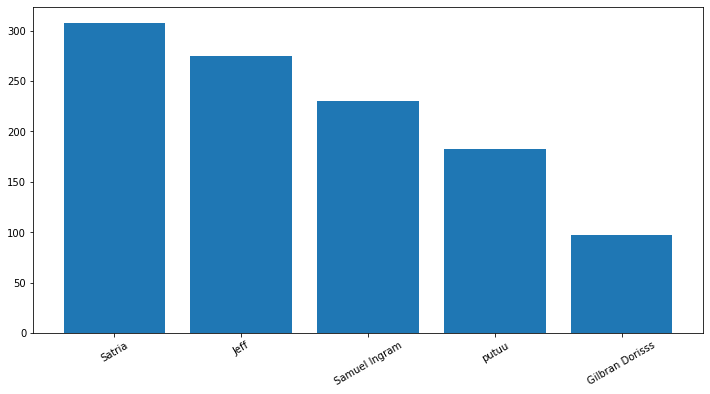

In [32]:
plt.figure(figsize=(12,6))
plt.bar(name, count)
plt.xticks(rotation=30)
plt.show()

In [33]:
dfs = round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

In [34]:
dfs

,name,percent
0,Satria,22.34
1,Jeff,19.94
2,Samuel Ingram,16.68
3,putuu,13.27
4,Gilbran Dorisss,7.03
5,Ega Anyar,4.42
6,Koniko,2.68
7,atrisna Riski,2.68
8,Putu,2.03
9,Tokek Anyar,1.89


## Feature III: Wordcloud

In [35]:
from wordcloud import WordCloud

In [36]:
df = df[df['user'] == 'putuu']
df = df[df['message'] != '<Media tidak disertakan>\n']

wcloud = WordCloud(width=500, height=500,
                           min_font_size=10, background_color='white')
df_wcloud = wcloud.generate(df['message'].str.cat(sep=" "))

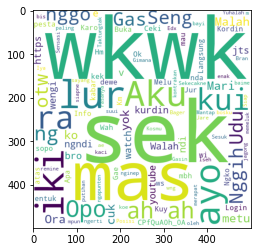

In [37]:
fig, ax = plt.subplots()
ax.imshow(df_wcloud)

# Feature IV: Common words

For me I use Indonesian stopwords from [masdevid repo](https://github.com/masdevid/ID-Stopwords)

In [38]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp = temp[temp['message'] != '<Media tidak disertakan>\n']

In [39]:
f = open('deploy/stop_id-eng.txt', 'r')
stop_words = f.read()
print(stop_words)

0
1
2
3
4
?

5
6
7
8
9
ada
adalah
adanya
adapun
agak
agaknya
agar
akan
akankah
akhir
akhiri
akhirnya
aku
akulah
amat
amatlah
anda
andalah
antar
antara
antaranya
apa
apaan
apabila
apakah
apalagi
apatah
artinya
asal
asalkan
atas
atau
ataukah
ataupun
awal
awalnya
bagai
bagaikan
bagaimana
bagaimanakah
bagaimanapun
bagi
bagian
bahkan
bahwa
bahwasanya
baik
bakal
bakalan
balik
banyak
bapak
baru
bawah
beberapa
begini
beginian
beginikah
beginilah
begitu
begitukah
begitulah
begitupun
bekerja
belakang
belakangan
belum
belumlah
benar
benarkah
benarlah
berada
berakhir
berakhirlah
berakhirnya
berapa
berapakah
berapalah
berapapun
berarti
berawal
berbagai
berdatangan
beri
berikan
berikut
berikutnya
berjumlah
berkali-kali
berkata
berkehendak
berkeinginan
berkenaan
berlainan
berlalu
berlangsung
berlebihan
bermacam
bermacam-macam
bermaksud
bermula
bersama
bersama-sama
bersiap
bersiap-siap
bertanya
bertanya-tanya
berturut
berturut-turut
bertutur
berujar
berupa
besar
betul
betulkah
biasa
biasanya
bila
bila

In [40]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [41]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,wkwk,7
1,ayo,5
2,opo,4
3,@6281226987632,3
4,seng,3
5,nggo,3
6,nggih,3
7,udu,3
8,kui,3
9,otw,3


### Feature V: Emoji

In [42]:
# !pip install emoji

In [43]:
import emoji

In [44]:
emojis = []

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [45]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [46]:
emoji_df

,0,1
0,💋,2
1,❤,1
2,🤣,1


<BarContainer object of 3 artists>

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128139 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128139 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


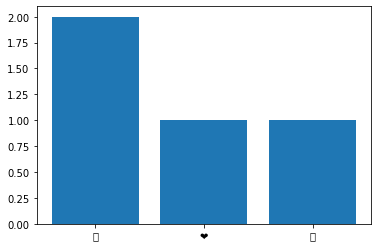

In [47]:
plt.bar(emoji_df[0].head(), emoji_df[1].head())

([<matplotlib.patches.Wedge at 0x18ca31b4df0>,
 [Text(6.735557395310444e-17, 1.1, '💋'),
  Text(-0.7778174593052025, -0.7778174593052023, '❤'),
  Text(0.7778174593052022, -0.7778174593052025, '🤣')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.00'),
  Text(0.4242640687119284, -0.4242640687119286, '25.00')])

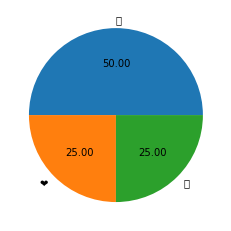

In [48]:
fig, ax = plt.subplots()
ax.pie(emoji_df[1].head(), labels=emoji_df[0].head(), autopct="%0.2f")

### Feature VI: Timeline

### Month

In [49]:
df['month_num'] = df['date'].dt.month

In [50]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [51]:
timeline

,year,month_num,month,message
0,2019,9,September,9
1,2019,12,December,3
2,2020,1,January,41
3,2020,2,February,5
4,2020,3,March,81
5,2020,4,April,8
6,2020,5,May,6


In [53]:
time = []

for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [54]:
time

['September-2019',
 'December-2019',
 'January-2020',
 'February-2020',
 'March-2020',
 'April-2020',
 'May-2020']

In [55]:
timeline['time'] = time

In [56]:
timeline

,year,month_num,month,message,time
0,2019,9,September,9,September-2019
1,2019,12,December,3,December-2019
2,2020,1,January,41,January-2020
3,2020,2,February,5,February-2020
4,2020,3,March,81,March-2020
5,2020,4,April,8,April-2020
6,2020,5,May,6,May-2020


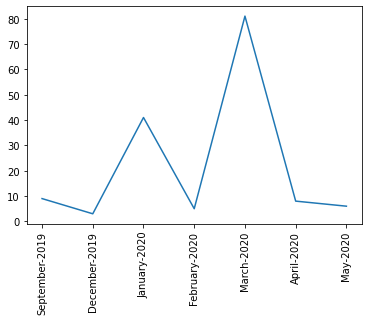

In [59]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

### Daily

In [60]:
df['only_date'] = df['date'].dt.date

In [61]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

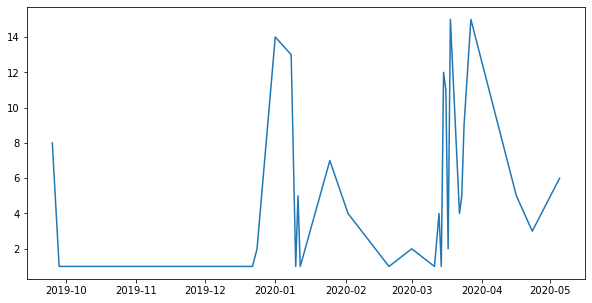

In [64]:
plt.figure(figsize=(10,5))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

## Feature VII: Activity mapper

###  Activity day

In [65]:
df['day_name'] = df['date'].dt.day_name()

In [66]:
df['day_name'].value_counts()

Wednesday    51
Sunday       24
Friday       20
Tuesday      19
Monday       16
Saturday     14
Thursday      9
Name: day_name, dtype: int64

### Activity month

In [67]:
df['month'].value_counts()

March        81
January      41
September     9
April         8
May           6
February      5
December      3
Name: month, dtype: int64

## Feature VIII: Busy hours

In [68]:
import seaborn as sns

In [70]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
24,2019-09-25 20:33:00,putuu,Posisi\n,2019,September,25,20,33,9,2019-09-25,Wednesday
25,2019-09-25 20:33:00,putuu,@6281225326062 @6281226987632 @6282322696883\n,2019,September,25,20,33,9,2019-09-25,Wednesday
28,2019-09-25 20:41:00,putuu,Sekecakne sek\n,2019,September,25,20,41,9,2019-09-25,Wednesday
29,2019-09-25 20:41:00,putuu,Kos e kaci\n,2019,September,25,20,41,9,2019-09-25,Wednesday
32,2019-09-25 20:59:00,putuu,Kosmu ngndi ?\n,2019,September,25,20,59,9,2019-09-25,Wednesday


In [71]:
period = []

for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str("00"))
    elif hour == 0:
        period.append(str("00") + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [72]:
df['period'] = period

In [73]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
186,2020-01-01 15:23:00,putuu,https://m.youtube.com/watch?v=CPfQuA0h_0A\n,2020,January,1,15,23,1,2020-01-01,Wednesday,15-16
894,2020-03-24 19:18:00,putuu,Asu wei\n,2020,March,24,19,18,3,2020-03-24,Tuesday,19-20
821,2020-03-22 23:04:00,putuu,Iwi\n,2020,March,22,23,4,3,2020-03-22,Sunday,23-00
154,2019-12-24 20:53:00,putuu,Seng jts merapat kurdin\n,2019,December,24,20,53,12,2019-12-24,Tuesday,20-21
231,2020-01-08 20:10:00,putuu,Ayo siapne am e nggo jagong bayi\n,2020,January,8,20,10,1,2020-01-08,Wednesday,20-21


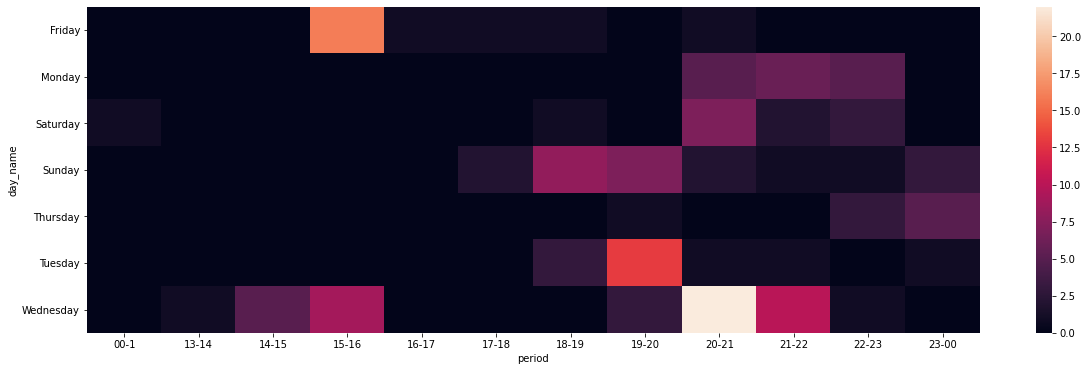

In [74]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

Thanks!!!